# 11110EE466000 Introduction of Reinforcement Learning Exam 2

Scoring rule:

Most of the rules are the same as the previous exam.


ONLY modify your code in the comment block to ensure your functions can be tested correctly.

## Required functions and library
Please run the following cells first.

In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
from matplotlib.table import Table

In [2]:
def draw_image(image):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = image.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i,j), val in np.ndenumerate(image):
        # Index either the first or second item of bkg_colors based on
        # a checker board pattern
        idx = [j % 2, (j + 1) % 2][i % 2]
        color = 'white'

        tb.add_cell(i, j, width, height, text='%.2f' %image[i][j], 
                    loc='center', facecolor=color)

    # Row Labels...
    for i, label in enumerate(range(len(image))):
        tb.add_cell(i, -1, width, height, text=label+1, loc='right', 
                    edgecolor='none', facecolor='none')
    # Column Labels...
    for j, label in enumerate(range(len(image))):
        tb.add_cell(-1, j, width, height/2, text=label+1, loc='center', 
                           edgecolor='none', facecolor='none')
    ax.add_table(tb)

In [3]:
def drawTable(data):
  fig = plt.figure()
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  plt.gca().invert_yaxis()
  for i in range(data.shape[0]):
    for j in range(data.shape[0]):
      plt.plot((i,i),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j),'-k')
      plt.plot((i+1,i),(j,j+1),'-k')
      plt.plot((i+1,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j+1,j+1),'-k')
      temp = max(data[j][i])
      if data[j][i][0]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i,j+1]], color='yellow'))
      if data[j][i][1]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i+1,j]], color='yellow'))
      if data[j][i][2]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i+1,j], [i+1,j+1]], color='yellow'))
      if data[j][i][3]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j+1], [i+1,j+1]], color='yellow'))

      plt.text(i+0.2,j+0.5,'%.1f' %data[j][i][0], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.2,'%.1f' %data[j][i][1], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.8,j+0.5,'%.1f' %data[j][i][2], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.8,'%.1f' %data[j][i][3], verticalalignment='center', horizontalalignment='center')

  plt.show()

In [4]:
def averages(a):
  return [np.average(a[:i+1]) for i in range(len(a))]

## Problem1 variable

You may add new variables here, but do not modify the order in ACTIONS.

In [48]:
GAMMA = 1
ALPHA = 0.1
EPSILON = 0.3
WORLD_SIZE = [5,10]
SWAMPS = [[0,0],[0,1],[0,2],[0,3],[0,4],[0,5],[0,6],[0,7],[0,8],[0,9],[1,3],[1,4],[1,5],[1,6],[2,4],[2,5]]
print(SWAMPS)
S0 = [1, 0]
ST = [1, 9]
# left, up, right, down
ACTIONS = [[0, -1], [-1, 0], [0, 1], [1, 0]] # left, up, right, down


[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [1, 3], [1, 4], [1, 5], [1, 6], [2, 4], [2, 5]]


## Problem1: double Q-learning
In this problem, you will implement the double Q-learning algorithm in a special environment. And compare the result to Q-learning and SARSA.

Given the following figure, please implement the corresponding environment.

In this environment, the tiles in green represent swamp. The yellow one and the blue one represent the initial state and terminal state, respectively.

In this grid world, we can choose the left, up, right and down.

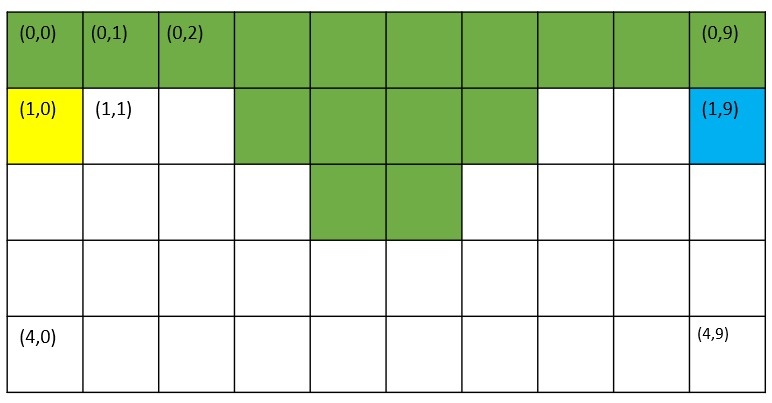

### 1.1(15%): Building the environment
This environment is simular to the one in HW4 and HW5, except that if falling into the swamp, the reward is given by a normal distribution  $\mathcal{N}(\mu = -100, \sigma = 150)$, where $\mu$ and $\sigma$ are mean and standard deviation, respectively.

Given a state and an action, please implement a function that returns the next state and reward.

The input state is a list, and the action is chosen from 'ACTIONS'.

And the output is a list and a floating-point number.


---

For example, 

input = [2,6], ACTIONS[3]

output = [[3, 6], -1]


---

input = [4,9], ACTIONS[2]

output = [[4, 9], -1]


---

input = [0,1], ACTIONS[1]

output = [[0, 1], R]


---


input = [1,0], ACTIONS[1]

output = [[0, 0], R]

---


input = [2,4], ACTIONS[2]

output = [[2, 5], R]


Where the distribution of R:
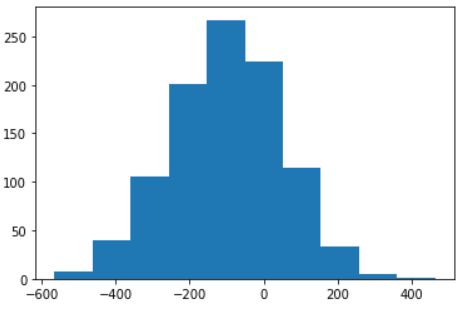

In [150]:
def step(state, action):
  #####YOUR CODE HERE#####
  state_n = (np.array(state) + np.array(action)).tolist()
  if state_n[0] < 0 or state_n[0] > 4 or state_n[1] < 0 or state_n[1] > 9:
    state_n = state
  if [state_n[0], state_n[1]] in SWAMPS:
    reward = float(rd.normal(-100, 150))
  else:
    reward = -1
  ########################
  return state_n, reward

#### Test your function


([3, 6], -1)
([4, 9], -1)
([0, 1], -221.70611621928794)
([0, 0], -205.27995142800785)
([0, 0], -168.36075402844597)
([2, 5], 50.78405718728612)
reward of state=[0,1] and action=ACTIONS[1]


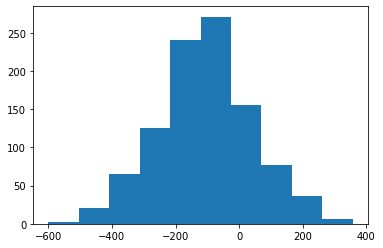

reward of state=[1,0] and action=ACTIONS[1]


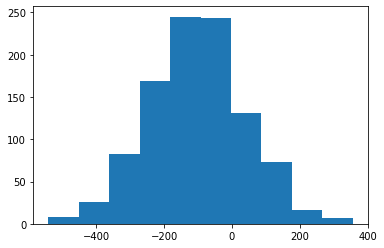

In [151]:
print(step([2,6], ACTIONS[3]))
print(step([4,9], ACTIONS[2]))
print(step([0,1], ACTIONS[1]))
print(step([1,0], ACTIONS[1]))
print(step([1,0], ACTIONS[1]))
print(step([2,4], ACTIONS[2]))
print('reward of state=[0,1] and action=ACTIONS[1]')
plt.figure()
plt.hist([i for _,i in [step([0,1], ACTIONS[1]) for j in range(1000)]])
plt.show()

print('reward of state=[1,0] and action=ACTIONS[1]')
plt.figure()
plt.hist([i for _,i in [step([1,0], ACTIONS[1]) for j in range(1000)]])
plt.show()

####$\epsilon$-greedy action selection

You will use this function for the following algorithms.

In [143]:
def chooseAction(state, qtable, epsilon):
  if rd.rand()>=epsilon:
    return np.argmax(qtable[state[0],state[1]])
  else:
    return rd.randint(qtable.shape[2])

###1.2(10%): Applying Q-learning
Using the functions in 1.1, please implement Q-learning with $\gamma=1 $, $\alpha=0.1$ and $\epsilon=0.3$ over 1000 episodes.

The output 'returns' is a list consisting of every return 'G' from each episode.

In [152]:
def Q_learning():
  qtable = np.zeros((5,10,4))
  returns = []
  for episode in range(1000):
  #####YOUR CODE HERE#####
    G = 0
    state = S0
    while state != ST:
      action = chooseAction(state, qtable, EPSILON)
      state_n, reward = step(state, ACTIONS[action])
      qtable[state[0], state[1], action] = qtable[state[0], state[1], action] + ALPHA * (reward + GAMMA * np.max(qtable[state_n[0], state_n[1]]) - qtable[state[0], state[1], action])
      G += reward
      state = state_n
  ########################
    returns.append(G)
    
  return returns

#### Test your function

Make sure your code can be executed properly; you can check the correctness at the end of problem1.

(-500.0, 0.0)

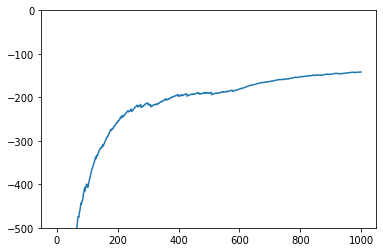

In [172]:
plt.figure()
plt.plot(averages(Q_learning()))
plt.ylim(-500,0)

###1.3(10%): Applying SARSA
Using the functions in 1.1, please implement SARSA with $\gamma=1 $, $\alpha=0.1$ and $\epsilon=0.3$ over 1000 episodes.

The output 'returns' is a list consisting of every return 'G' from each episode.

In [154]:
def sarsa():
  qtable = rd.rand(5,10,4)
  returns = []
  for episode in range(1000):
  #####YOUR CODE HERE#####
    G = 0
    state = S0
    action = chooseAction(state, qtable, EPSILON)
    while state != ST:
      state_n, reward = step(state, ACTIONS[action])
      action_n = chooseAction(state_n, qtable, EPSILON)
      qtable[state[0], state[1], action] = qtable[state[0], state[1], action] + ALPHA * (reward + GAMMA * qtable[state_n[0], state_n[1], action_n] - qtable[state[0], state[1], action])
      G += reward
      action = action_n
      state = state_n
  ########################
    returns.append(G)
    
  return returns

#### Test your function

Make sure your code can be executed properly; you can check the correctness at the end of problem1.

(-500.0, 0.0)

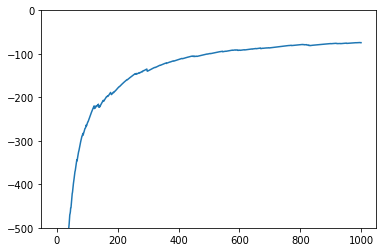

In [173]:
plt.figure()
plt.plot(averages(sarsa()))
plt.ylim(-500,0)

###1.4(10%): Applying double Q-learning

Apply double Q-learning with the following algorithm using the functions in 1.1.

The output 'returns' is a list consisting every return 'G' from each episode.

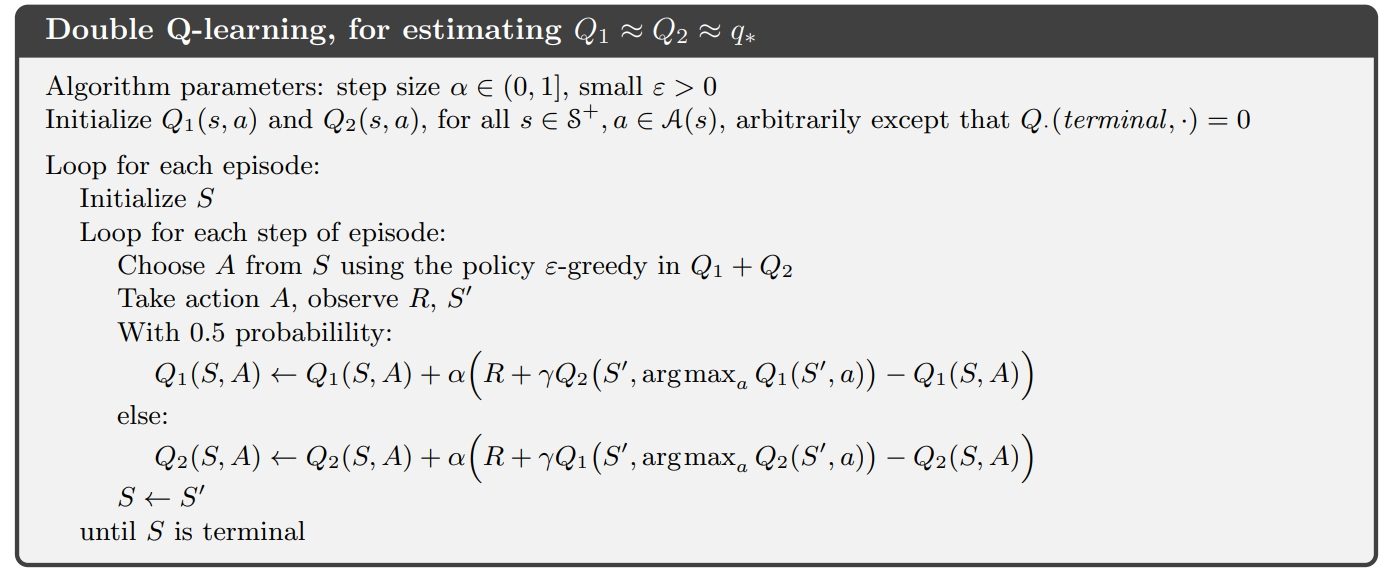

In [167]:
def double_Q_learning():
  qtable1 = np.zeros((5,10,4))
  qtable2 = np.zeros((5,10,4))
  qtable1[ST[0], ST[1]] = 0
  qtable2[ST[0], ST[1]] = 0
  returns = []
  for episode in range(1000):
  #####YOUR CODE HERE#####
    G = 0
    state = S0
    while state != ST:
      action = chooseAction(state, qtable1+qtable2, EPSILON)
      state_n, reward = step(state, ACTIONS[action])
      if rd.rand()>0.5:
        qtable1[state[0], state[1], action] = qtable1[state[0], state[1], action] + ALPHA * (reward + GAMMA * qtable2[state_n[0],state_n[1],np.argmax(qtable1[state_n[0], state_n[1]])] - qtable1[state[0], state[1], action])
      else:
        qtable2[state[0], state[1], action] = qtable2[state[0], state[1], action] + ALPHA * (reward + GAMMA * qtable1[state_n[0],state_n[1],np.argmax(qtable2[state_n[0], state_n[1]])] - qtable2[state[0], state[1], action])
      G += reward
      state = state_n
  ########################
    returns.append(G)
    
  return returns

####Test your function

(-500.0, 0.0)

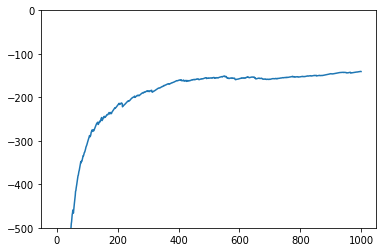

In [168]:
plt.figure()
plt.plot(averages(double_Q_learning()))
plt.ylim(-500,0)

###1.5(10%): Applying Monte Carlo
Using the functions in 1.1, implement Monte Carlo with $\gamma=1 $, $\alpha=0.1$ and $\epsilon=0.3$ over 1000 episodes.

The output 'returns' is a list consisting of every return 'G' from each episode.

In [156]:
def monte_carlo():
  qtable = rd.rand(5,10,4)
  returns = []
  for episode in range(1000):
  ###### Your code here ######
    tra =[]
    state = S0
    G = 0
    while state != ST:
      action = chooseAction(state, qtable, EPSILON)
      state_n, reward = step(state, ACTIONS[action])
      tra.append([state, action, reward])
      state = state_n
    rewards = 0 
    for i in range(len(tra)-1,-1,-1):
      rewards += tra[i][2]
      iterate = 0
      G = tra[i][2] + GAMMA * G
      for j in range(i):
        if tra[i][0] == tra[j][0]:
          iterate = 1
      if i == 0 or iterate == 0:
        qtable[tra[i][0][0],tra[i][0][1],tra[i][1]] = qtable[tra[i][0][0],tra[i][0][1],tra[i][1]] + ALPHA * (G - qtable[tra[i][0][0],tra[i][0][1],tra[i][1]])
  ################################
    returns.append(rewards)
  return returns

####Test your function

(-1000.0, 0.0)

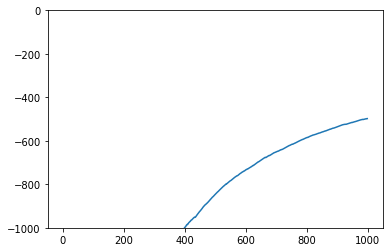

In [160]:
plt.figure()
plt.plot(averages(monte_carlo()))
plt.ylim(-1000,0)

### Comparison

This section is used to verify your correctness.

Since it takes longer to run this part, please make sure your function can be executed successfully above.

The result should look like the following figure, where the relationship between the algorithm is:

sarsa > double_Q_learning > Q_learning

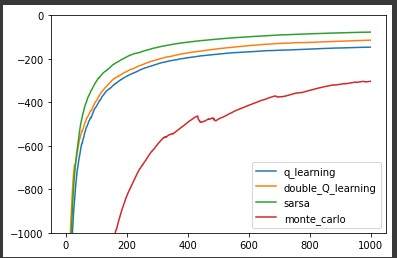

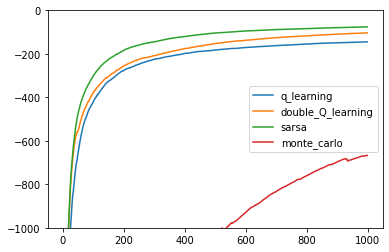

In [171]:
plt.figure()
plt.plot(np.average([averages(Q_learning()) for i in range(10)],axis=0),label='q_learning')
plt.plot(np.average([averages(double_Q_learning()) for i in range(10)],axis=0),label='double_Q_learning')
plt.plot(np.average([averages(sarsa()) for i in range(10)],axis=0),label='sarsa')
plt.plot(np.average([averages(monte_carlo()) for i in range(2)],axis=0),label='monte_carlo')
plt.ylim(-1000, 0)
plt.legend()
plt.show()
# about 1.5 min
# if more than 2 minute, you can restart this block

## Problem2: n-step TD for estimating
Consider the gridworld as shown below. This is an episodic task, with start state S0 and terminal state ST, and the actions causing the agent to move left, up, right, and down. Reward is −1 on all transitions except those into the regions marked in gray, which represent the cliff. Stepping into these regions incurs a reward of −100 and sends the agent instantly back to the start.



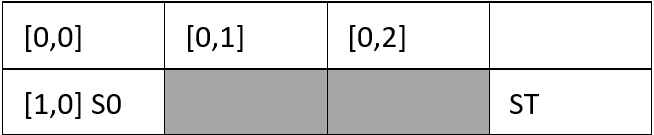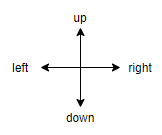

### 2.1(15%): Implement the environment
Given a state and an action, please return the next-state and the reward.

The input state is a list, and the action should be chosen from the variable 'ACTIONS'.
ACTIONS[0], ACTIONS[1], ACTIONS[2], ACTIONS[3], 
represent left, up, right, down, correspondingly.


And the output is a list with [next_state, reward].

Please follow the steps to implement:

1. The reward is -100 if the next-state is in the cliff. Otherwise, the reward should be -1.

2. if the next-state is outside, the next-state will be corrected to the input state.

3. if the next-state is in the cliff, the next-state will be corrected to S0





For example,

input = [1,0], ACTIONS[2]

output = [[1,0], -100]


---


input = [0,2], ACTIONS[3]

output = [[1,0], -100]


---


input = [0,3], ACTIONS[3]

output = [[1,3], -1]


---


input = [0,3], ACTIONS[2]

output = [[0,3], -1]

In [136]:
def step_cliff(state, action):
  ###### Your code here ######
  state_n = (np.array(state) + np.array(action)).tolist()
  if state_n[0] < 0 or state_n[0] >= 2 or state_n[1] < 0 or state_n[1] >= 4:
    state_n = state
  if [state_n[0], state_n[1]] in [[1,1],[1,2]]:
    state_n = [1, 0]
    reward = -100
  else:
    reward = -1
  ############################
        
  return state_n, reward

#### Test your function

In [137]:
print(step_cliff([1,0], ACTIONS[2]))
print(step_cliff([0,2], ACTIONS[3]))
print(step_cliff([0,3], ACTIONS[3]))
print(step_cliff([0,3], ACTIONS[2]))

([1, 0], -100)
([1, 0], -100)
([1, 3], -1)
([0, 3], -1)



###2.2(10%): One-step TD for estimating random walk policy

In this environment, Use one-step TD method to estimate the state-value under the random walk policy.

please set learning rate = 0.025, discount rate = 0.9, number of episode = 100,  initial state = [1,0], terminal state = [1,3] in this problem.

In the following ''TD1()'' function, your object is that, updating variable ''vtable'' properly.



In [ ]:
def loss(s):
  state_value = np.array([[-146,-173,-155,-65],[-181,0.0,0.0,0.0]])
  return np.sum(np.square(s-state_value))
def TD1():
  GAMMA = 0.9
  ALPHA = 0.025
  S0 = [1,0]
  ST = [1,3]
  vtable = np.zeros([2,4])
  all_loss =[]
  for i in range(100):
    
  ######your code here#######
 
  ###########################
    all_loss.append(loss(vtable))# don't modify the indent 
    
  return np.array(all_loss)

#### Test your function

We had calculated state-value through dynamic programing, and we will compare your ''vtable'' with that to evaluate loss.
So check the average loss of ''TD1()''  that should be close to 0 after 100 episodes. 

In the following figure, y-axis is average loss of ''TD1()'', x-axis is episode.


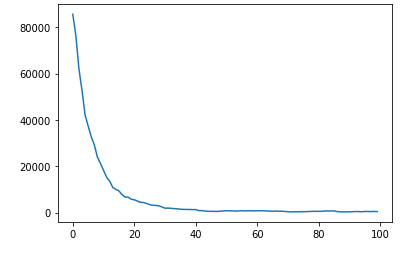

In [ ]:
all_loss = np.array([TD1() for i in range(10)])
avg_TD1 = np.average(all_loss,axis=0)
plt.plot(avg_TD1)


###2.3(10%): 4-step TD for estimating random walk policy

In this environment, Use 4-step TD method to estimate the state-value under the random walk policy.

Where learning rate = 0.025, discount rate = 0.9, number of episode = 100,  initial state = [1,0], terminal state = [1,3].

In the following ''TD4()'' function, your object is that, updating variable ''vtable'' properly.


In [ ]:
def loss(s):
  state_value = np.array([[-146,-173,-155,-65],[-181,0.0,0.0,0.0]])
  return np.sum(np.square(s-state_value))
def TD4():
  GAMMA = 0.9
  ALPHA = 0.025
  S0 = [1,0]
  ST = [1,3]
  vtable  = np.zeros([2,4])
  all_loss =[]
  for i in range(100):
  #### your code here########
   
      
  ###########################
    all_loss.append(loss(vtable))# don't modify the indent 
  return all_loss

#### Test your function

We had calculated state-value through dynamic programing, and we will compare your ''vtable'' with that to evaluate loss.
So check the average loss of ''TD4()'' that should be close to 0 after 100 episode. 

In the following figure y-axis is average loss of ''TD4()'', x-axis is episode.


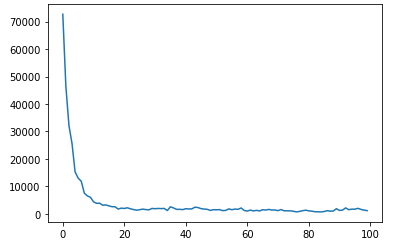

In [ ]:
all_loss = np.array([TD4() for i in range(10)])
avg_TD4 = np.average(all_loss,axis=0)
plt.plot(avg_TD4)

###comparison
  If your code is correct, you will get figure like below.

  In the figure, y-axis is average loss, x-axis is episode.

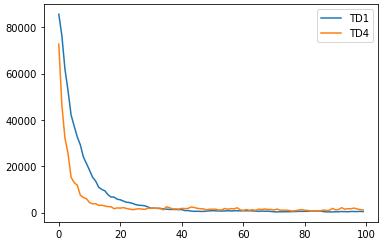

In [ ]:
plt.plot(avg_TD1,label = 'TD1')
plt.plot(avg_TD4,label = 'TD4')
plt.legend()

###2.4(10%): Off-policy Monte Carlo in random walk policy

In this environment, Use Off-policy Monte Carlo method to estimate  the state-action-value greedy policy.

Please set discount rate = 0.9, number of episode = 500,  initial state = [1,0], terminal state = [1,3], and behavior policy is random walk policy.

In the following ''MC_OFF()'' function, your object is to update variable ''Q'' properly.

In [ ]:
def loss(s):
  state_value = np.array([[-8.52,-8.27,-5.0,-1.16],[-11.34,0.0,0.0,0.0]])
  return np.sum(np.square(s-state_value))

def MC_OFF():
  GAMMA = 0.9
  S0 = [1,0]
  ST = [1,3]
  Q = np.zeros([2,4,4])
  C = np.zeros([2,4,4])
  all_loss =[]
  for i in range(500):
    
  #### your code here  ####
   
  ############################

  #don't modify bellow, it transform Q to V 
    vtable = np.zeros([2,4])
    for i in range(2):
      for j in range(4):
        vtable[i][j] = (0.9)*np.max(Q[i,j])+(0.1/4)*np.sum(Q[i,j])
      
    all_loss.append(loss(vtable))
  return np.array(all_loss)

###comparison
  If your code is correct, you will get figure like below.

  In the figure, y-axis is average loss, x-axis is episode.

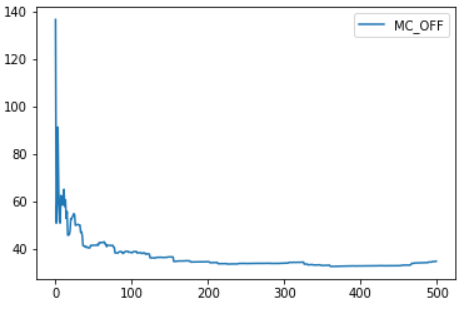

In [ ]:
all_loss = np.array([MC_OFF() for i in range(2)])
avg_MC_OFF = np.average(all_loss,axis=0)
plt.plot(avg_MC_OFF,label = 'MC_OFF')
plt.legend()